<a href="https://colab.research.google.com/github/sona-gj/Sentiment-Analysis-of-Social-Media-Data/blob/master/SMA_Assignment1.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
#import statements

import pandas as pd
import matplotlib.pyplot as plt
import re
import nltk
import numpy as np
import contractions
import gensim.downloader as api
import tensorflow_hub as hub
import tensorflow as tf
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.feature_selection import chi2,SelectKBest
from sklearn.svm import LinearSVC
from pylab import barh, plot, yticks, show, grid, xlabel, figure
from sklearn.feature_selection import chi2

In [ ]:
# Download stopwords if not already done
nltk.download('stopwords')
nltk.download('punkt')
nltk.download('averaged_perceptron_tagger')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


True

In [ ]:
#importing the dataset csv file

data = pd.read_csv("dataset.csv")
data.head(3)

,id,text,text_sentiment,username,hashtags,created_at,user followers count,replycount,retweetcount,likecount,quotecount,language,media,retweetedTweet,quotedtweet,inReplyToTweetId,inReplyToUser,mentionedUsers
0,1538666561615015938,When will the #NYSE #stockmarketcrash happen?,Neutral,tradexlnc,"['NYSE', 'stockmarketcrash']",2022-06-19 23:34:29+00:00,10669,0,0,1,0,en,NaN,NaN,NaN,NaN,NaN,NaN
1,1538665013799489536,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,niftymonday,"['stockmarkets', 'stockmarketcrash', 'trading'...",2022-06-19 23:28:20+00:00,100,0,1,8,0,en,NaN,NaN,NaN,NaN,NaN,NaN
2,1538660868027830274,The stock market needs to crash hard to make i...,Negative,kyle132313,"['stockmarketcrash', 'economy', 'rich', 'Fed']",2022-06-19 23:11:52+00:00,0,0,0,0,0,en,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
#Removing unwanted columns

data = data.drop(columns = ["id","username","created_at","user followers count","replycount","retweetcount","likecount","quotecount",'media', 'retweetedTweet', 'quotedtweet',
       'inReplyToTweetId', 'inReplyToUser', 'mentionedUsers','hashtags','language'])
data.head(3)


,text,text_sentiment
0,When will the #NYSE #stockmarketcrash happen?,Neutral
1,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative
2,The stock market needs to crash hard to make i...,Negative


In [ ]:
#Basic Cleaning

def remove_unwanted(text):

    #expand the words
    text = contractions.fix(text)

    #convert the text to lowercase
    text = text.lower()

    #remove the urls
    text = re.sub(r'https?:\/\/\S*', '', text, flags=re.MULTILINE)

    # Remove mentions, special characters, and additional URLs
    text = ' '.join(re.sub(r"(@[A-Za-z0-9]+)|([^0-9A-Za-z \t])|(\\w+:\/\/\S+)", " ", text).split())
    return text

#before cleaning
tweet_2582_before_cleaning = data.loc[2582, 'text']
print(tweet_2582_before_cleaning)

#clean the text
data['cleaned_text'] = data['text'].apply(remove_unwanted)

#after cleaning
tweet_2582_cleaned = data.loc[2582, 'cleaned_text']
print(tweet_2582_cleaned)

data.head(3)

I think I’m at the acceptance stage of this crash. It could go to negative and it wouldn’t affect me cause I’m numb. #stockmarketcrash #BitcoinCrash #BuyBitcoin #LifeIsShort #coldheartedbitch 🥰💗
i think i am at the acceptance stage of this crash it could go to negative and it would not affect me because i am numb stockmarketcrash bitcoincrash buybitcoin lifeisshort coldheartedbitch


,text,text_sentiment,cleaned_text
0,When will the #NYSE #stockmarketcrash happen?,Neutral,when will the nyse stockmarketcrash happen
1,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,aaj ka gyan if a company is not a quality comp...
2,The stock market needs to crash hard to make i...,Negative,the stock market needs to crash hard to make i...


In [ ]:
#Basic Preprocessing

# Set stopwords
stopWords = set(stopwords.words('english'))

# custom words to remove
custom_words = {'stockmarketcrash','stockmarkets','bearmarket','stock','market'}

#Stemming - PorterStemmer
ps = PorterStemmer()

# Function to remove stopwords and custom words
def remove_unwanted(text):
    words = word_tokenize(text)
    # Filter out stopwords and custom words
    wordsFiltered = [w for w in words if w not in stopWords and w not in custom_words]
    stemmed_words = [ps.stem(word) for word in wordsFiltered]
    return ' '.join(stemmed_words)

data['cleaned_text'] = data['cleaned_text'].apply(remove_unwanted)
data.head(10)


,text,text_sentiment,cleaned_text
0,When will the #NYSE #stockmarketcrash happen?,Neutral,nyse happen
1,Aaj ka gyan:\n\nIf a company isn't a quality c...,Negative,aaj ka gyan compani qualiti compani buy price ...
2,The stock market needs to crash hard to make i...,Negative,need crash hard make realist keep print money ...
3,"Those who are ""Buying on DIP"" will very soon b...",Neutral,buy dip soon becom promot compani stockstobuy ...
4,@rdrhwke I wish our so-called President were t...,Positive,wish call presid transitori mean realli short ...
5,@paulkrugman Paul you wrote the #stockmarketcr...,Negative,paul wrote predict inflat war 2015 year presid...
6,@_Checkmatey_ #stockmarketcrash best explanat...,Negative,checkmatey best explan damn mask crash money p...
7,#stockmarketcrash best explanation\nDamn Mask...,Negative,best explan damn mask crash money printer brrr...
8,10 stocks for father's day..!!\n\n$AAPL\n$KO\n...,Neutral,10 stock father day aapl ko pep hd low swk de ...
9,This may push us toward #WW3 .\n#GreatDepressi...,Negative,may push us toward ww3 greatdepress disast joe...


In [ ]:
#splitting the dataset into trainset and testset in the ratio- 80:20

x = data.drop(columns = ['text_sentiment'])
y = data.text_sentiment
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

#printing shapes of testing and training sets :

print("shape of original dataset :", data.shape)
print("shape of input - training set", x_train.shape)
print("shape of output - training set", y_train.shape)
print("shape of input - testing set", x_test.shape)
print("shape of output - testing set", y_test.shape)

shape of original dataset : (33946, 3)
shape of input - training set (27156, 2)
shape of output - training set (27156,)
shape of input - testing set (6790, 2)
shape of output - testing set (6790,)


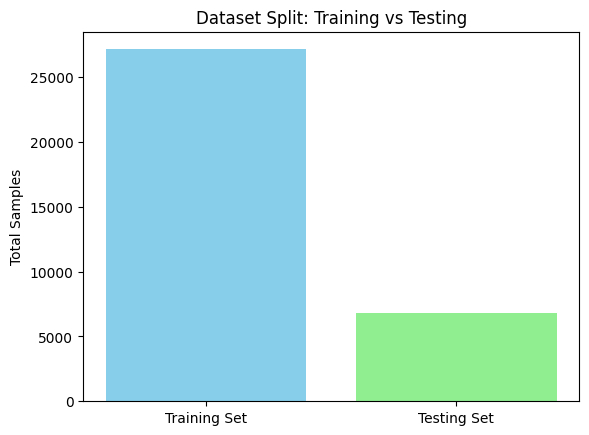

In [ ]:
#representing the trainset and testset pictorically

labels = ['Training Set', 'Testing Set']
sizes = [ x_train.shape[0], x_test.shape[0]]

plt.bar(labels, sizes, color=['skyblue', 'lightgreen'])
plt.title('Dataset Split: Training vs Testing')
plt.ylabel('Total Samples')

plt.show()

In [ ]:
#Bag of words

vectorizer = CountVectorizer()
X_train = vectorizer.fit_transform(x_train['cleaned_text'])
X_train_array = X_train.toarray()

X_test = vectorizer.transform(x_test['cleaned_text'])
X_test_array = X_test.toarray()

X_train_chi = X_train_array
X_test_chi = X_test_array


print(X_train_model.shape)
print(X_train_model.shape)

(27156, 26854)
(6790, 26854)


In [ ]:
#TF-IDF

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(x_train['cleaned_text'])
X_test = vectorizer.transform(x_test['cleaned_text'])

X_train_chi = X_train
X_test_chi = X_test

X_train_model = X_train
X_test_model = X_test

print(X_train_model.shape)
print(X_test_model.shape)

(27156, 26812)
(6790, 26812)


In [ ]:
#chi-sqaure

# compute chi2 for each feature
chi2score = chi2(X_train_chi,y_train)[0]
print("Chi2 scores:", chi2score)

chi2_selector = SelectKBest(chi2, k=100)
# Apply chi-square feature selection to the training data
X_train_selected = chi2_selector.fit_transform(X_train_chi, y_train)

# Apply the same feature selection to the test data
X_test_selected = chi2_selector.transform(X_test_chi)

X_train_model = X_train_selected
X_test_model = X_test_selected

Chi2 scores: [1.02570555 0.39848741 0.94671599 ... 0.35250378 0.77983186 1.04701088]


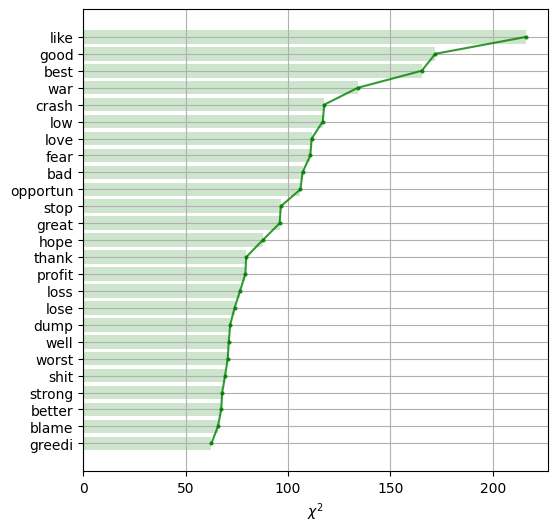

In [ ]:
#plot chi-sqaure

# Assuming vectorizer and chi2score are already computed
wscores = list(zip(vectorizer.get_feature_names_out(), chi2score))  # list to allow sorting multiple times
wchi2 = sorted(wscores, key=lambda x: x[1])  # Sort by chi-square score

# Extract the top 25 features based on chi-square scores
topchi2 = list(zip(*wchi2[-25:]))  # Unzips the sorted list

# Extract labels and scores
labels = topchi2[0]  # Feature names
scores = topchi2[1]  # Chi-square scores

# Plotting
x = np.arange(len(scores))  # x-axis is just the indices

figure(figsize=(6, 6))
barh(x, scores, align='center', alpha=.2, color='g')  # Horizontal bar chart
plot(scores, x, '-o', markersize=2, alpha=.8, color='g')  # Plot line with markers
yticks(x, labels)  # Add labels to the y-ticks
xlabel('$\\chi^2$')  # X-axis label with escaped backslash
  # X-axis label
grid(True)  # Add grid for better readability
show()  # Show the plot


In [ ]:
import gensim.downloader as api

In [ ]:
#word2vec

word2vec_model = api.load('word2vec-google-news-300')

[==================================================] 100.0% 1662.8/1662.8MB downloaded


In [ ]:
#gloVe

glove_model = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
# Function to average word vectors for a document
def document_to_vector(text, model, num_features):
    words = word_tokenize(text)
    feature_vector = np.zeros((num_features,), dtype='float32')
    n_words = 0

    # Only include words that are in the Word2Vec vocabulary
    for word in words:
        if word in model.key_to_index:
            n_words += 1
            feature_vector = np.add(feature_vector, model[word])

    if n_words > 0:
        feature_vector = np.divide(feature_vector, n_words)

    return feature_vector

In [ ]:
# glove training

# Step 3: Convert your text data to GloVe embeddings
num_features = glove_model.vector_size  # Get the number of features (100 for this GloVe model)

# Convert training data
X_train_glove = np.array([document_to_vector(text, glove_model, num_features) for text in x_train['cleaned_text']])

# Convert test data
X_test_glove = np.array([document_to_vector(text, glove_model, num_features) for text in x_test['cleaned_text']])

X_train_model = X_train_glove
X_test_model = X_test_glove

# Check the shape of the resulting feature matrices
print(X_train_model.shape)
print(X_test_model.shape)

(27156, 100)
(6790, 100)


In [ ]:
#word2vec training

# Assuming your dataset is in x_train['cleaned_text'] and x_test['cleaned_text']
num_features = word2vec_model.vector_size  # Get the dimension of the word embeddings (e.g., 300 for Google News)

# Convert training data
X_train_word2vec = np.array([document_to_vector(text, word2vec_model, num_features) for text in x_train['cleaned_text']])

# Convert test data
X_test_word2vec = np.array([document_to_vector(text, word2vec_model, num_features) for text in x_test['cleaned_text']])

X_train_model = X_train_word2vec
X_test_model = X_test_word2vec

# Check the shape of the resulting feature matrices
print(X_train_model.shape)  # Should be (num_samples, 300)
print(X_test_model.shape)   # Should be (num_samples, 300)


(27156, 300)
(6790, 300)


In [ ]:
#USE

# Step 1: Load the Universal Sentence Encoder (USE) from TensorFlow Hub
encoder = hub.KerasLayer("https://tfhub.dev/google/universal-sentence-encoder/4", trainable=False)


In [ ]:
#USE

# Convert the text data into embeddings
X_train_model = encoder(tf.constant(x_train['cleaned_text'].to_list()))  # Convert pandas series to list and then to tf.constant
X_test_model = encoder(tf.constant(x_test['cleaned_text'].to_list()))

# Convert the embeddings to NumPy arrays
X_train_model = X_train_model.numpy()
X_test_model = X_test_model.numpy()


In [ ]:
# SVM Classifier

clf = LinearSVC(max_iter=10000)
clf.fit(X_train_model, y_train)
y_pred = clf.predict(X_test_model)

In [ ]:
# Logistic Regression classifier

classifier = LogisticRegression(max_iter=1000)
classifier.fit(X_train_model, y_train)

# Make predictions on the test set
y_pred = classifier.predict(X_test_model)

In [ ]:
# Evaluate performance

accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, average='weighted')
recall = recall_score(y_test, y_pred, average='weighted')
f1 = f1_score(y_test, y_pred, average='weighted')

print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")

Accuracy: 0.6555
Precision: 0.6547
Recall: 0.6555
F1-Score: 0.6548
